In [2]:
#!pip install pyhive

In [3]:
#!pip install thrift


In [ ]:
#!pip install sasl

In [13]:
#if !pip install sasl doesnt work
# conda install -c conda-forge sasl

In [ ]:
#!pip install thrift_sasl

In [2]:
from pyhive import hive
import sasl
import thrift
import thrift_sasl
import sqlalchemy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# System
import warnings

In [3]:
#Create Hive connection 

conn = hive.Connection(host="localhost", port=10000)


In [108]:

df = pd.read_sql("SELECT * FROM facebookanalysis.facebook_tab", conn, index_col=None, parse_dates=None)

In [65]:
df.head()

,facebook_tab.id,facebook_tab.age,facebook_tab.day,facebook_tab.year,facebook_tab.month,facebook_tab.gender,facebook_tab.tenure,facebook_tab.friends,facebook_tab.friends_init,facebook_tab.likes,facebook_tab.likes_recd,facebook_tab.mlikes,facebook_tab.mlikes_recd,facebook_tab.wlikes,facebook_tab.wlikes_recd
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0


In [66]:
# check for unique column names 
df.columns

Index(['facebook_tab.id', 'facebook_tab.age', 'facebook_tab.day',
       'facebook_tab.year', 'facebook_tab.month', 'facebook_tab.gender',
       'facebook_tab.tenure', 'facebook_tab.friends',
       'facebook_tab.friends_init', 'facebook_tab.likes',
       'facebook_tab.likes_recd', 'facebook_tab.mlikes',
       'facebook_tab.mlikes_recd', 'facebook_tab.wlikes',
       'facebook_tab.wlikes_recd'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   facebook_tab.id            99003 non-null  object
 1   facebook_tab.age           99003 non-null  object
 2   facebook_tab.day           99003 non-null  object
 3   facebook_tab.year          99003 non-null  object
 4   facebook_tab.month         99003 non-null  object
 5   facebook_tab.gender        99003 non-null  object
 6   facebook_tab.tenure        99003 non-null  object
 7   facebook_tab.friends       99003 non-null  object
 8   facebook_tab.friends_init  99003 non-null  object
 9   facebook_tab.likes         99003 non-null  object
 10  facebook_tab.likes_recd    99003 non-null  object
 11  facebook_tab.mlikes        99003 non-null  object
 12  facebook_tab.mlikes_recd   99003 non-null  object
 13  facebook_tab.wlikes        99003 non-null  object
 14  facebo

In [68]:
df["facebook_tab.gender"].unique()

array(['male', 'female', 'NA'], dtype=object)

# replacing Na as Null values

In [70]:
df = df.applymap(lambda x: np.nan if x == 'NA' else x)

In [71]:
df.isna().mean()

facebook_tab.id              0.000000
facebook_tab.age             0.000000
facebook_tab.day             0.000000
facebook_tab.year            0.000000
facebook_tab.month           0.000000
facebook_tab.gender          0.001768
facebook_tab.tenure          0.000020
facebook_tab.friends         0.000000
facebook_tab.friends_init    0.000000
facebook_tab.likes           0.000000
facebook_tab.likes_recd      0.000000
facebook_tab.mlikes          0.000000
facebook_tab.mlikes_recd     0.000000
facebook_tab.wlikes          0.000000
facebook_tab.wlikes_recd     0.000000
dtype: float64

In [72]:
df.isna().sum()

facebook_tab.id                0
facebook_tab.age               0
facebook_tab.day               0
facebook_tab.year              0
facebook_tab.month             0
facebook_tab.gender          175
facebook_tab.tenure            2
facebook_tab.friends           0
facebook_tab.friends_init      0
facebook_tab.likes             0
facebook_tab.likes_recd        0
facebook_tab.mlikes            0
facebook_tab.mlikes_recd       0
facebook_tab.wlikes            0
facebook_tab.wlikes_recd       0
dtype: int64

In [73]:
df.dtypes

facebook_tab.id              object
facebook_tab.age             object
facebook_tab.day             object
facebook_tab.year            object
facebook_tab.month           object
facebook_tab.gender          object
facebook_tab.tenure          object
facebook_tab.friends         object
facebook_tab.friends_init    object
facebook_tab.likes           object
facebook_tab.likes_recd      object
facebook_tab.mlikes          object
facebook_tab.mlikes_recd     object
facebook_tab.wlikes          object
facebook_tab.wlikes_recd     object
dtype: object

In [74]:
print(df[df[['facebook_tab.id', 'facebook_tab.age', 'facebook_tab.day',
       'facebook_tab.year', 'facebook_tab.month', 'facebook_tab.gender',
       'facebook_tab.tenure', 'facebook_tab.friends',
       'facebook_tab.friends_init', 'facebook_tab.likes',
       'facebook_tab.likes_recd', 'facebook_tab.mlikes',
       'facebook_tab.mlikes_recd', 'facebook_tab.wlikes',
       'facebook_tab.wlikes_recd']].isnull()])

      facebook_tab.id facebook_tab.age facebook_tab.day facebook_tab.year  \
0                 NaN              NaN              NaN               NaN   
1                 NaN              NaN              NaN               NaN   
2                 NaN              NaN              NaN               NaN   
3                 NaN              NaN              NaN               NaN   
4                 NaN              NaN              NaN               NaN   
...               ...              ...              ...               ...   
98998             NaN              NaN              NaN               NaN   
98999             NaN              NaN              NaN               NaN   
99000             NaN              NaN              NaN               NaN   
99001             NaN              NaN              NaN               NaN   
99002             NaN              NaN              NaN               NaN   

      facebook_tab.month facebook_tab.gender facebook_tab.tenure  \
0      

In [75]:
df['facebook_tab.id'] = pd.to_numeric(df['facebook_tab.id'],errors='coerce')

df['facebook_tab.age'] = pd.to_numeric(df['facebook_tab.age'],errors='coerce')

df['facebook_tab.day'] = pd.to_numeric(df['facebook_tab.day'],errors='coerce')

df['facebook_tab.year'] = pd.to_numeric(df['facebook_tab.year'],errors='coerce')

df['facebook_tab.month'] = pd.to_numeric(df['facebook_tab.month'],errors='coerce')

df['facebook_tab.tenure'] = pd.to_numeric(df['facebook_tab.tenure'],errors='coerce')

df['facebook_tab.friends'] = pd.to_numeric(df['facebook_tab.friends'],errors='coerce')

df['facebook_tab.friends_init'] = pd.to_numeric(df['facebook_tab.friends_init'],errors='coerce')

df['facebook_tab.likes'] = pd.to_numeric(df['facebook_tab.likes'],errors='coerce')

df['facebook_tab.likes_recd'] = pd.to_numeric(df['facebook_tab.likes_recd'],errors='coerce')

df['facebook_tab.mlikes'] = pd.to_numeric(df['facebook_tab.mlikes'],errors='coerce')

df['facebook_tab.mlikes_recd'] = pd.to_numeric(df['facebook_tab.mlikes_recd'],errors='coerce')

df['facebook_tab.wlikes'] = pd.to_numeric(df['facebook_tab.wlikes'],errors='coerce')

df['facebook_tab.wlikes_recd'] = pd.to_numeric(df['facebook_tab.wlikes_recd'],errors='coerce')
   


In [76]:
df.dtypes

facebook_tab.id                int64
facebook_tab.age               int64
facebook_tab.day               int64
facebook_tab.year              int64
facebook_tab.month             int64
facebook_tab.gender           object
facebook_tab.tenure          float64
facebook_tab.friends           int64
facebook_tab.friends_init      int64
facebook_tab.likes             int64
facebook_tab.likes_recd        int64
facebook_tab.mlikes            int64
facebook_tab.mlikes_recd       int64
facebook_tab.wlikes            int64
facebook_tab.wlikes_recd       int64
dtype: object

In [77]:
df.isna().mean()

facebook_tab.id              0.000000
facebook_tab.age             0.000000
facebook_tab.day             0.000000
facebook_tab.year            0.000000
facebook_tab.month           0.000000
facebook_tab.gender          0.001768
facebook_tab.tenure          0.000020
facebook_tab.friends         0.000000
facebook_tab.friends_init    0.000000
facebook_tab.likes           0.000000
facebook_tab.likes_recd      0.000000
facebook_tab.mlikes          0.000000
facebook_tab.mlikes_recd     0.000000
facebook_tab.wlikes          0.000000
facebook_tab.wlikes_recd     0.000000
dtype: float64

In [ ]:
#df['facebook_tab.gender'] = df['facebook_tab.gender'].astype('string')

# missing values

In [35]:
#installing Missingno library
#!pip install missingno

In [36]:
import missingno as msno

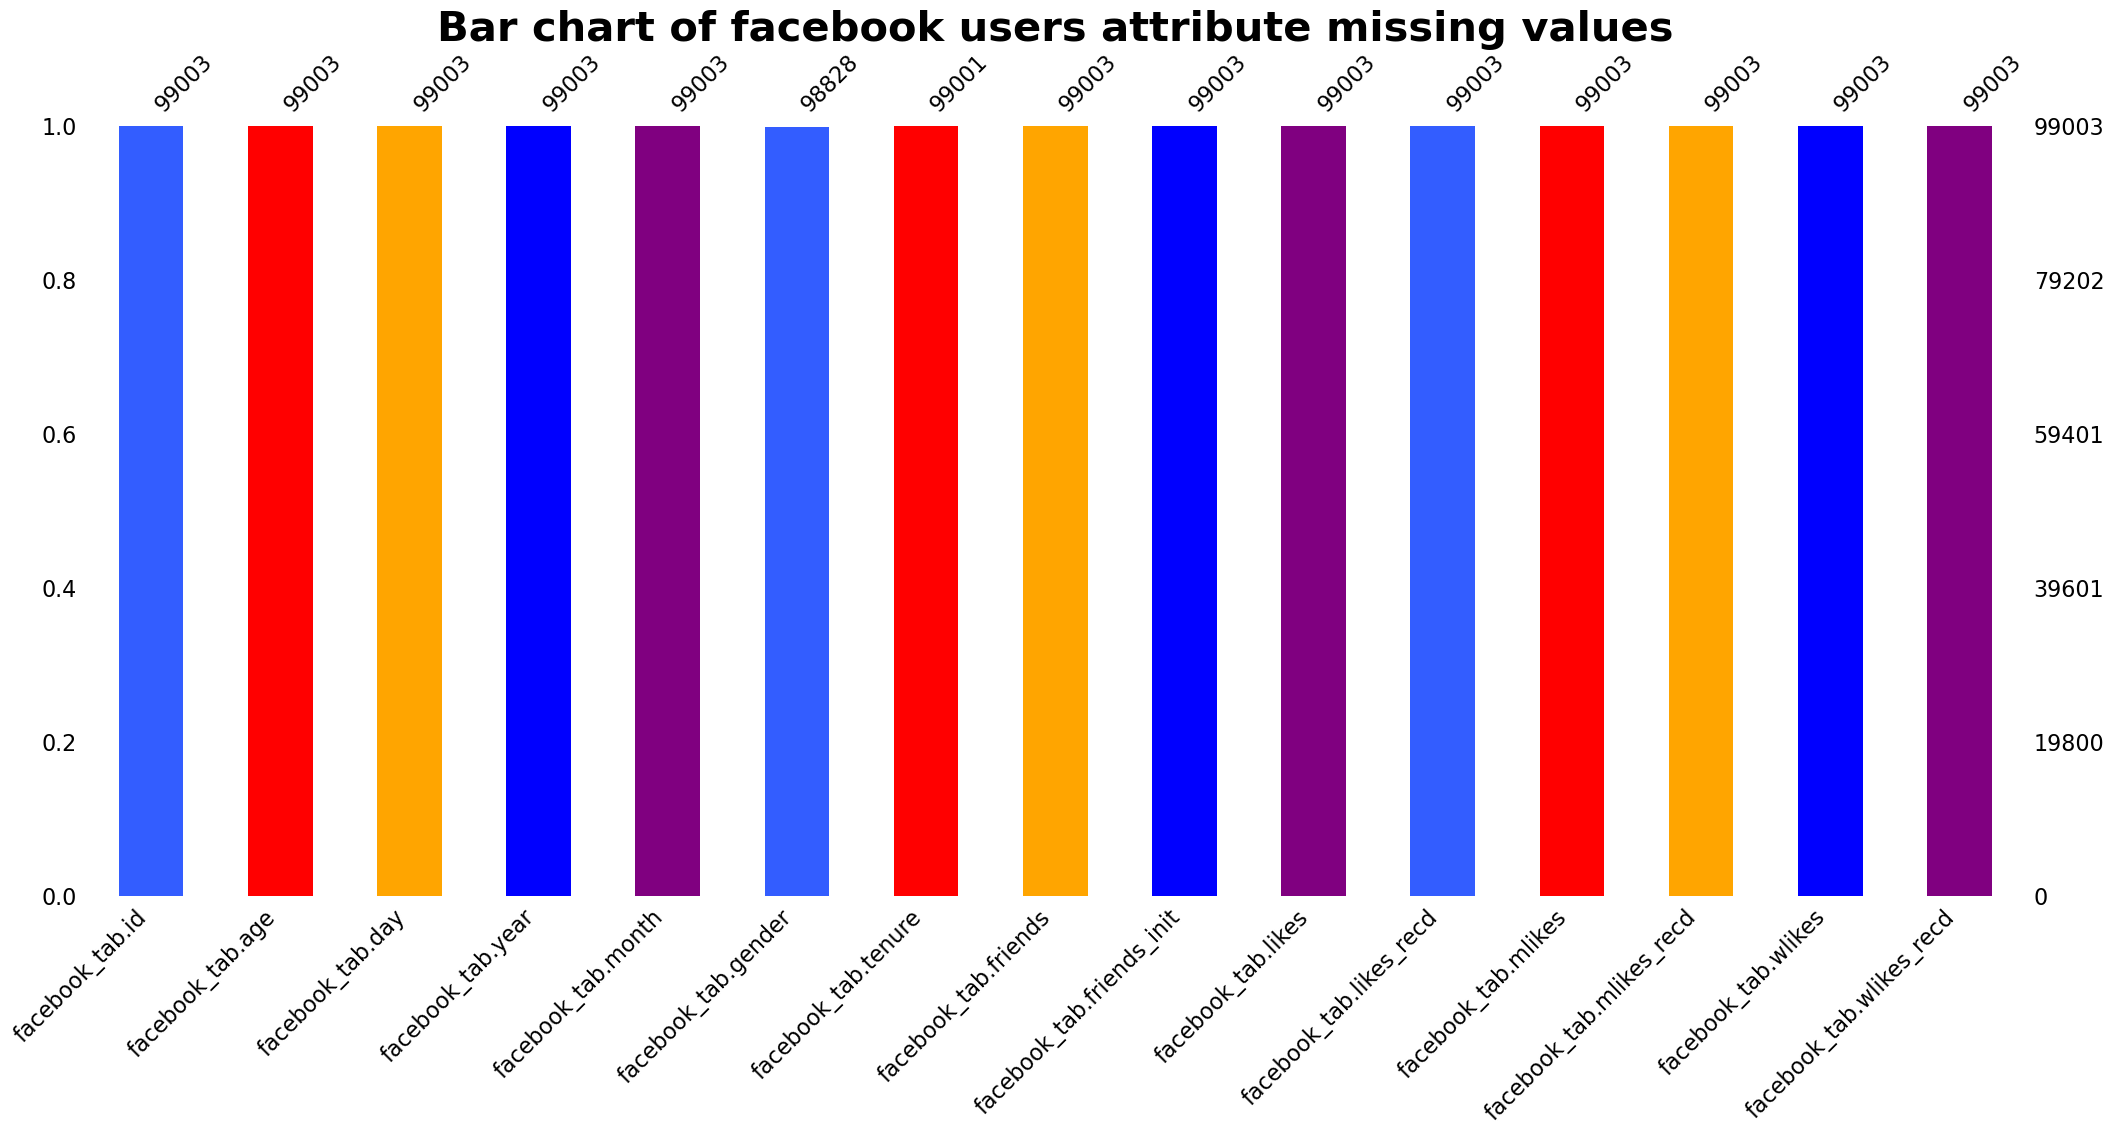

In [115]:
colors_list = [ '#335DFF', 'Red', 'Orange', 'Blue', 'purple']
msno.bar(df, color=colors_list)
plt.title('Bar chart of facebook users attribute missing values', fontsize=30, fontweight='bold')
plt.show()

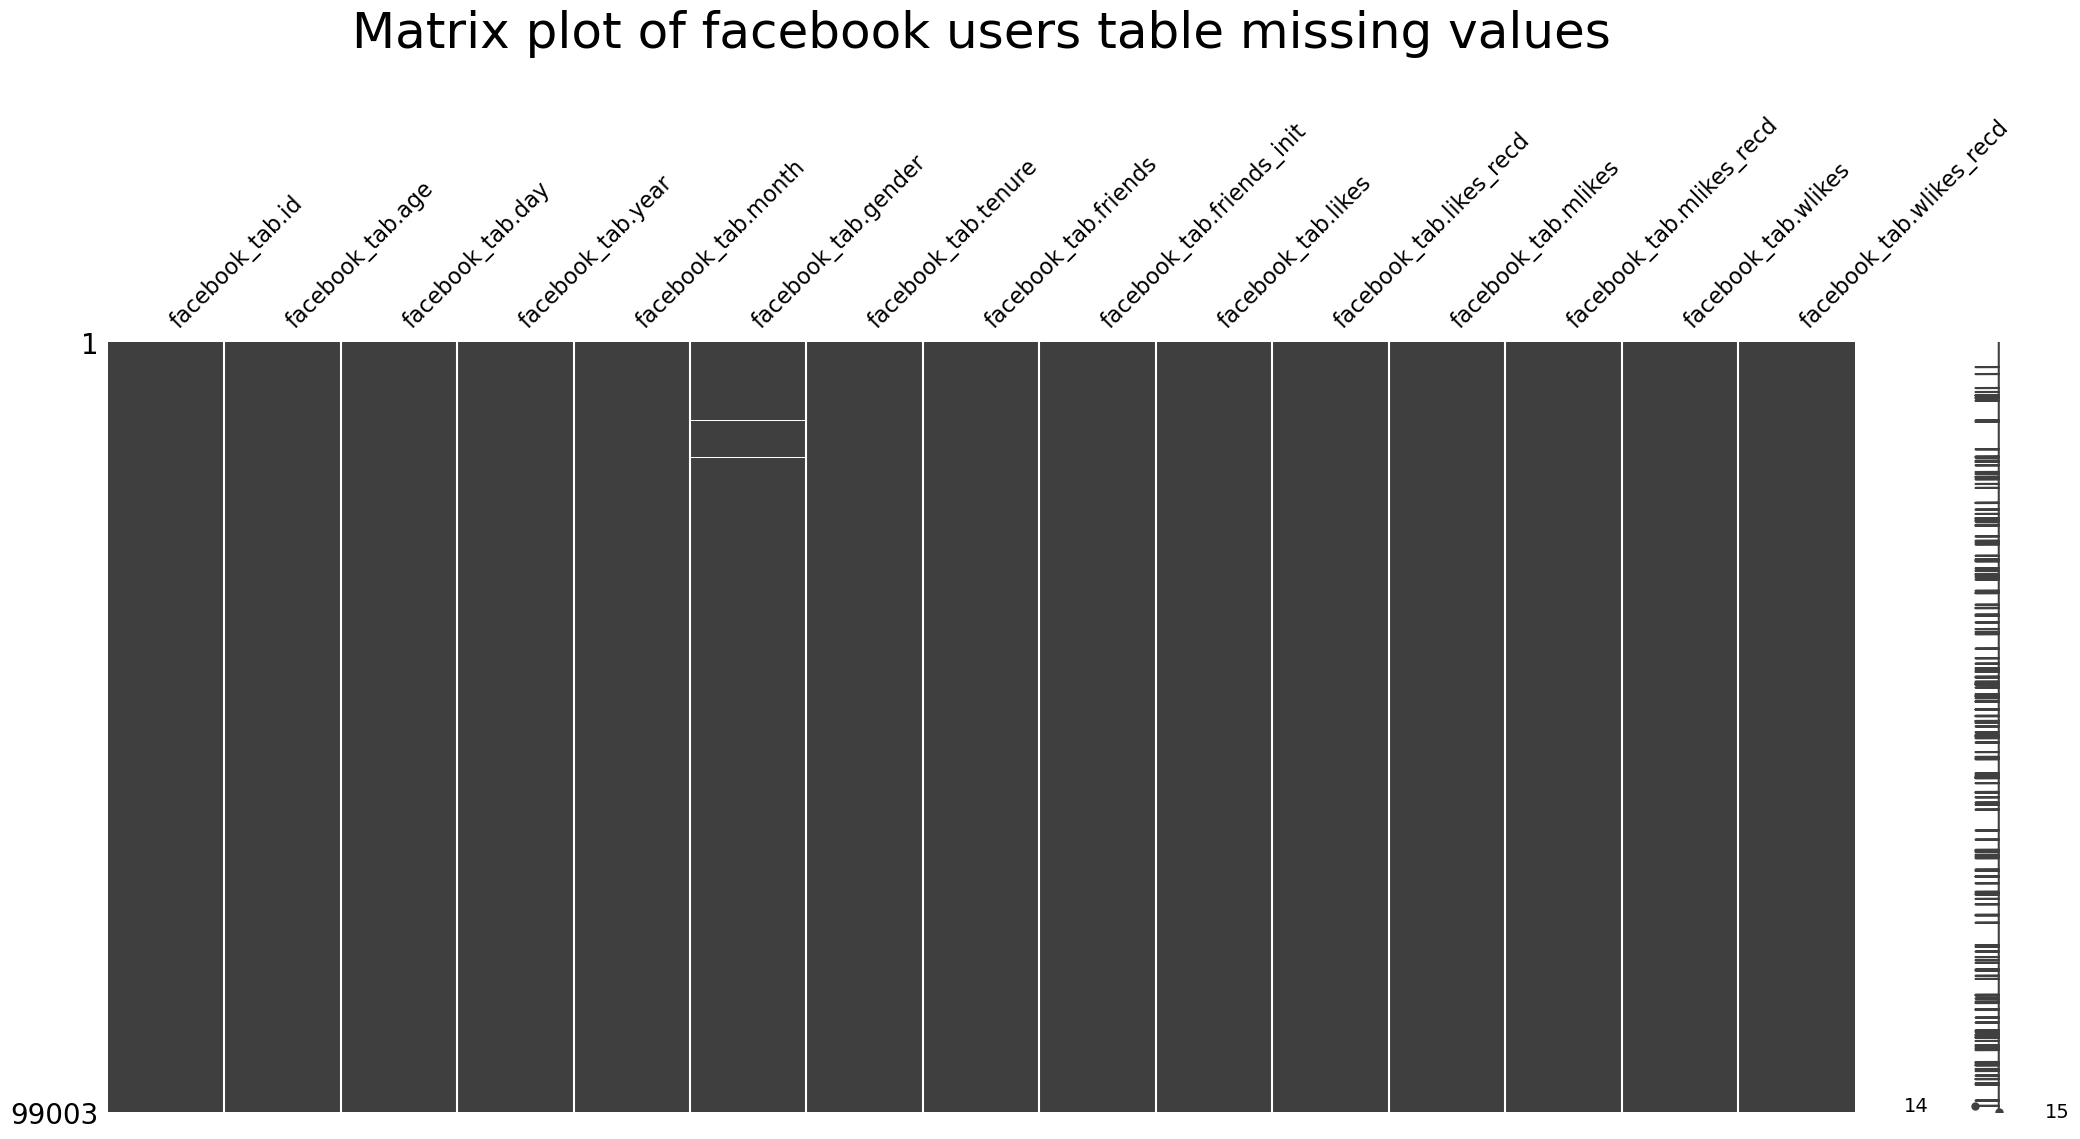

In [117]:
#matrix chart

msno.matrix(df)
#colors_list = ['#335DFF', 'Red', 'Orange', 'Blue', 'purple']
plt.rc('font', size=30)
plt.title('Matrix plot of facebook users table missing values\n')
plt.show()

# Dealing with missing values

In [85]:
df_new = df.interpolate()
df_new.isna().sum()

facebook_tab.id                0
facebook_tab.age               0
facebook_tab.day               0
facebook_tab.year              0
facebook_tab.month             0
facebook_tab.gender          175
facebook_tab.tenure            0
facebook_tab.friends           0
facebook_tab.friends_init      0
facebook_tab.likes             0
facebook_tab.likes_recd        0
facebook_tab.mlikes            0
facebook_tab.mlikes_recd       0
facebook_tab.wlikes            0
facebook_tab.wlikes_recd       0
dtype: int64

In [88]:
df_final = df_new.fillna(method='ffill')
df_final.head()

,facebook_tab.id,facebook_tab.age,facebook_tab.day,facebook_tab.year,facebook_tab.month,facebook_tab.gender,facebook_tab.tenure,facebook_tab.friends,facebook_tab.friends_init,facebook_tab.likes,facebook_tab.likes_recd,facebook_tab.mlikes,facebook_tab.mlikes_recd,facebook_tab.wlikes,facebook_tab.wlikes_recd
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [89]:
df_final.isna().sum()

facebook_tab.id              0
facebook_tab.age             0
facebook_tab.day             0
facebook_tab.year            0
facebook_tab.month           0
facebook_tab.gender          0
facebook_tab.tenure          0
facebook_tab.friends         0
facebook_tab.friends_init    0
facebook_tab.likes           0
facebook_tab.likes_recd      0
facebook_tab.mlikes          0
facebook_tab.mlikes_recd     0
facebook_tab.wlikes          0
facebook_tab.wlikes_recd     0
dtype: int64

In [99]:
df_final.head()

,facebook_tab.id,facebook_tab.age,facebook_tab.day,facebook_tab.year,facebook_tab.month,facebook_tab.gender,facebook_tab.tenure,facebook_tab.friends,facebook_tab.friends_init,facebook_tab.likes,facebook_tab.likes_recd,facebook_tab.mlikes,facebook_tab.mlikes_recd,facebook_tab.wlikes,facebook_tab.wlikes_recd
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [ ]:
#save the clean data

In [106]:
df_final.to_csv('/Users/AKB_CIM/Programming/python/Hadoop_python/pseudo_facebook_clean.csv', index=False)

In [100]:
import os


In [103]:
os.getcwd()

'/Users/AKB_CIM/Programming/python/Hadoop_python'